# Evoked结构
Evoked potential(EP)诱发电位或诱发反应是指在出现诸如闪光或纯音之类的刺激后，从人类或其他动物的神经系统，特别是大脑的特定部分记录的特定模式的电位。不同形式和类型的刺激会产生不同类型的电位。

诱发电位振幅往往较低，从小于1微伏到数微伏不等，而脑电图为数十微伏，肌电图为毫伏，心电图通常接近20毫伏。为了在EEG、ECG、EMG等生物信号和环境噪声的背景下解决这些低幅度电位，通常需要对信号进行平均。信号被时间锁定在刺激上，大部分噪声是随机产生的，这样就可以通过对重复响应来平均掉噪声。

诱发电位(Evoked)结构主要用于存储实验期间的平均数据，在MNE中，创建Evoked对象通常使用mne.Epochs.average()来平均epochs数据来实现。

In [1]:
#导入包
import os.path as op
import matplotlib.pyplot as plt
import mne

"""
从文件中读取诱发数据集
"""
data_path = mne.datasets.sample.data_path()
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis-ave.fif')
evokeds = mne.read_evokeds(fname, baseline=(None, 0), proj=True)
print(evokeds)  # 使用read_evokeds函数加载诱发文件，并返回evoked实例列表，可以使用condition参数来读取指定类别

Reading C:\Users\mrrai\mne_data\MNE-sample-data\MEG\sample\sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline co

In [2]:
evoked = mne.read_evokeds(fname, condition='Left Auditory')
evoked.apply_baseline((None, 0)).apply_proj()
print(evoked)
# 打印evoked的信息，这个信息和Raw对象以及Epochs对象中的info很相似
print(evoked.info)
print(evoked.times)

Reading C:\Users\mrrai\mne_data\MNE-sample-data\MEG\sample\sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
Applying baseline correction (mode: mean)
Projections have already been applied. Setting proj attribute to True.
<Evoked | 'Left Auditory' (average, N=55), -0.1998 – 0.49949 sec, baseline -0.199795 – 0 sec, 376 ch, ~4.5 MB>
<Info | 16 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: Fa

In [3]:
# 查看evoked结构其他属性
print(evoked.nave)  # Number of averaged epochs.
print(evoked.first)  # First time sample.
print(evoked.last)  # Last time sample.
print(evoked.comment)  # Comment on dataset. Usually the condition.
print(evoked.kind)  # Type of data, either average or standard_error.

55
-120
300
Left Auditory
average


Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


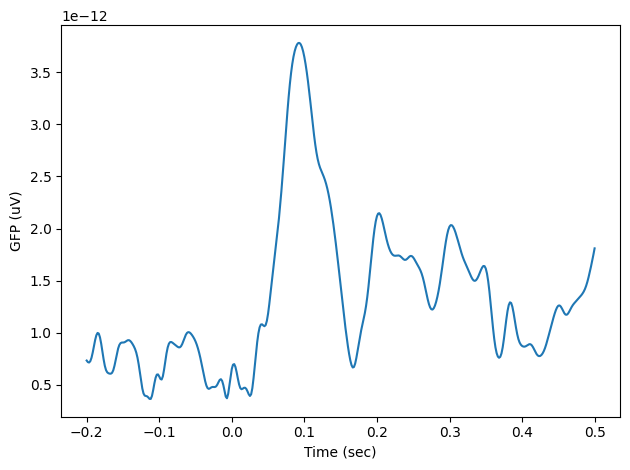

In [4]:
# 快速提取并绘制全局能量谱(Global Field Power, GFP)作为跨通道的标准偏差
gfp = evoked.copy().pick_types(eeg=True, meg=False).data.std(axis=0)
fig, ax = plt.subplots(1)
ax.plot(evoked.times, gfp / 1e6)  # scale to uV
ax.set(xlabel='Time (sec)', ylabel='GFP (uV)')
fig.tight_layout()
